In [98]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings

In [99]:
warnings.filterwarnings('ignore')

In [100]:
# Load the data
transactions = pd.read_csv('transactions_modified.csv')
print(transactions.head())
print(transactions.info())

   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   206  CASH_OUT    62927.08   C473782114           0.00            0.00   
1   380   PAYMENT    32851.57  C1915112886           0.00            0.00   
2   570  CASH_OUT  1131750.38  C1396198422     1131750.38            0.00   
3   184  CASH_OUT    60519.74   C982551468       60519.74            0.00   
4   162   CASH_IN    46716.01  C1759889425     7668050.60      7714766.61   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isPayment  \
0  C2096898696       649420.67       712347.75        0          0   
1   M916879292            0.00            0.00        0          1   
2  C1612235515       313070.53      1444820.92        1          0   
3  C1378644910        54295.32       182654.50        1          0   
4  C2059152908      2125468.75      2078752.75        0          0   

   isMovement  accountDiff  
0           1    649420.67  
1           0         0.00  
2           1    818679.85  


The number of fraudulent transactions is 282
The aggregate statistics of amount is:
count    1.000000e+03
mean     5.373080e+05
std      1.423692e+06
min      0.000000e+00
25%      2.933705e+04
50%      1.265305e+05
75%      3.010378e+05
max      1.000000e+07
Name: amount, dtype: float64


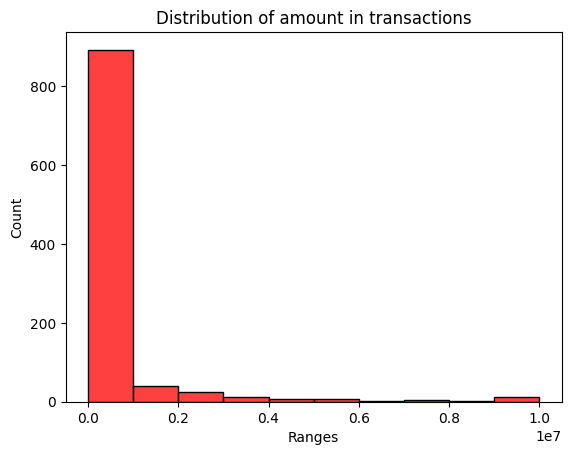

<Figure size 640x480 with 0 Axes>

In [101]:
# How many fraudulent transactions?
frad_trans = np.sum(transactions.isFraud)
print(f'The number of fraudulent transactions is {frad_trans}')
# Summary statistics on amount column
aggreg = transactions.amount.describe()
print(f'The aggregate statistics of amount is:\n{aggreg}')
sns.histplot(transactions.amount, color='red', bins=10)
plt.title('Distribution of amount in transactions')
plt.xlabel('Ranges')
plt.ylabel('Count')
plt.show()
plt.clf()


In [102]:
# Create isPayment field
transactions['isPayment'] = 0
transactions.isPayment[(transactions.type == 'PAYMENT') | (transactions.type == 'DEBIT')] = 1
print(transactions[['type', 'isPayment']])

# Create isMovement field
transactions['isMovement'] = 0
transactions.isMovement[(transactions.type == 'CASH_OUT') | (transactions.type == 'TRANSFER')] = 1
print(transactions[['type', 'isMovement']])

# Create accountDiff field
transactions['accountDiff'] = np.abs(transactions.oldbalanceOrg - transactions.oldbalanceDest)
print(transactions.head())

         type  isPayment
0    CASH_OUT          0
1     PAYMENT          1
2    CASH_OUT          0
3    CASH_OUT          0
4     CASH_IN          0
..        ...        ...
995  CASH_OUT          0
996  TRANSFER          0
997  CASH_OUT          0
998  CASH_OUT          0
999  TRANSFER          0

[1000 rows x 2 columns]
         type  isMovement
0    CASH_OUT           1
1     PAYMENT           0
2    CASH_OUT           1
3    CASH_OUT           1
4     CASH_IN           0
..        ...         ...
995  CASH_OUT           1
996  TRANSFER           1
997  CASH_OUT           1
998  CASH_OUT           1
999  TRANSFER           1

[1000 rows x 2 columns]
   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   206  CASH_OUT    62927.08   C473782114           0.00            0.00   
1   380   PAYMENT    32851.57  C1915112886           0.00            0.00   
2   570  CASH_OUT  1131750.38  C1396198422     1131750.38            0.00   
3   184  CASH_OUT    60519.74 

In [103]:
# Create features and label variables
features = transactions[['amount', 'isPayment', 'isMovement', 'accountDiff']]
labels = transactions[['isFraud']]

In [104]:
# Split dataset
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.3, random_state=6)

In [105]:
# Normalize the features variables
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [106]:
# Fit the model to the training data
lrm = LogisticRegression()
model = lrm.fit(features_train, labels_train)
THRESHOLD = 0.5
labels_pred = np.where(model.predict_proba(features_test)[:,1] > THRESHOLD, 1, 0)

In [107]:
# Score the model on the training data
print(model.score(features_train, labels_train))

# Score the model on the test data
print(model.score(features_test, labels_test))

# Print the model coefficients
print(model.coef_)

0.8414285714285714
0.85
[[ 2.76728882 -0.61054026  2.06030391 -1.29953811]]


In [108]:
# New transaction data
transaction1 = np.array([123456.78, 0.0, 1.0, 54670.1])
transaction2 = np.array([98765.43, 1.0, 0.0, 8524.75])
transaction3 = np.array([543678.31, 1.0, 0.0, 510025.5])

# Create a new transaction
transaction4 = np.array([6472.54, 1.0, 0.0, 55901.23])

In [109]:
# Combine new transactions into a single array
sample_transactions = np.stack((transaction1, transaction2, transaction3, transaction4))

# Normalize the new transactions
scaler.transform(sample_transactions)

# Predict fraud on the new transactions
pred_samples = model.predict(sample_transactions)
print(pred_samples)
# Show probabilities on the new transactions
pred_samples_prob = model.predict_proba(sample_transactions)
print(pred_samples_prob)

[1 1 1 0]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
